<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/multi_class_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape (60000, 28, 28)
x_test  shape (10000, 28, 28)
t_train shape (60000,)
t_test  shape (10000,)
0
(28, 28)


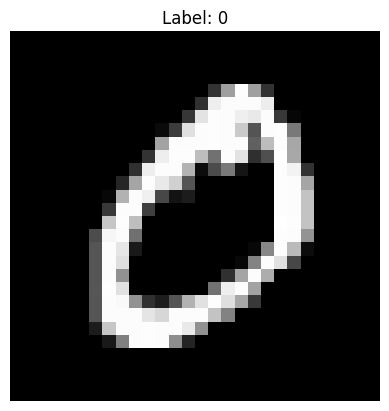

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt  # ✅ 추가

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("x_test  shape", x_test.shape)
print("t_train shape", t_train.shape)
print("t_test  shape", t_test.shape)

img = x_train[1]
label = t_train[1]

print(label)  # 예: 5
print(img.shape)  # (28, 28)

# ✅ Colab에서는 plt.imshow 사용
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(x_train.shape[0],-1)# (60000, 784)
x_test  = x_test.reshape(x_test.shape[0],-1) # (10000, 784)

t_train = to_categorical(t_train, num_classes = 10)
t_test  = to_categorical(t_test, num_classes = 10)

print("x_train shape", x_train.shape)
print("x_test  shape", x_test.shape)
print("t_train shape", t_train.shape)
print("t_test  shape", t_test.shape)

print("x_train[0] \n", x_train[0])
print("t_train[0] \n", t_train[0])

x_train shape (60000, 784)
x_test  shape (10000, 784)
t_train shape (60000, 10)
t_test  shape (10000, 10)
x_train[0] 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82 

epoch:     0, Train Acc: 0.15770, Test Acc: 0.16030, Loss: 2.37226
epoch:   600, Train Acc: 0.92547, Test Acc: 0.92200, Loss: 0.19715
epoch:  1200, Train Acc: 0.95195, Test Acc: 0.94800, Loss: 0.19939
epoch:  1800, Train Acc: 0.96252, Test Acc: 0.95590, Loss: 0.06868
epoch:  2400, Train Acc: 0.96498, Test Acc: 0.95790, Loss: 0.05123
epoch:  3000, Train Acc: 0.96778, Test Acc: 0.96060, Loss: 0.01780
epoch:  3600, Train Acc: 0.97572, Test Acc: 0.96590, Loss: 0.01880
epoch:  4200, Train Acc: 0.97450, Test Acc: 0.96300, Loss: 0.02453
epoch:  4800, Train Acc: 0.97843, Test Acc: 0.96820, Loss: 0.02069
epoch:  5400, Train Acc: 0.97973, Test Acc: 0.96870, Loss: 0.01697
epoch:  6000, Train Acc: 0.98117, Test Acc: 0.96690, Loss: 0.02732
epoch:  6600, Train Acc: 0.98343, Test Acc: 0.97040, Loss: 0.01130
epoch:  7200, Train Acc: 0.98338, Test Acc: 0.97040, Loss: 0.02635
epoch:  7800, Train Acc: 0.98607, Test Acc: 0.97110, Loss: 0.01872
epoch:  8400, Train Acc: 0.98662, Test Acc: 0.97230, Loss: 0.0

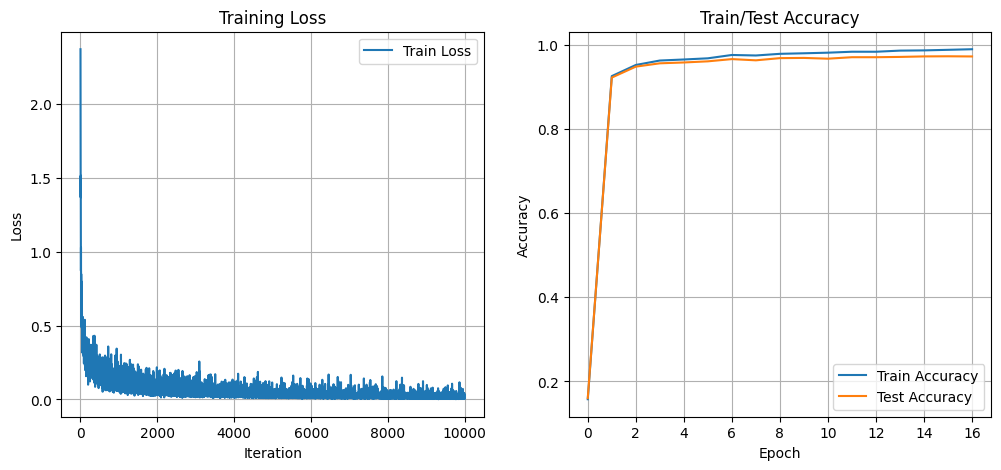

In [4]:


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self,x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask]=0

        return out

    def backward(self,dout):
        dout[self.mask] =0
        dx =dout

        return dx

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self,x):
        out = 1/(1+np.exp(-x))
        self.out = out

        return out

    def backward(self,dout):
        dx = dout*(1.0-self.out)*self.out

        return dx

class Affine:
    def __init__(self,W,b):
        self.W = W
        self.b = b
        self.dW = None
        self.db = None
        self.x = None

    def forward(self,x):
        self.x = x
        out  = np.matmul(self.x,self.W) + self.b

        return out

    def backward(self,dout):
        dx = np.matmul(dout,self.W.T)
        self.dW = np.matmul(self.x.T,dout)
        self.db = np.sum(dout,axis=0)

        return dx

def cross_entropy_error(y,t):
    #y: output of the Neural network
    #t: label
    if y.ndim ==1: #데이터가 하나인 경우라도
        t = t.reshape(1,t.size) #2차원 배열로 바꿈
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

def softmax(x):
    if x.ndim ==2:
       x = x-np.max(x,axis=1,keepdims=True)
       exp_x = np.exp(x)
       return exp_x/np.sum(exp_x,axis=1,keepdims=True)
    else:
        x = x-np.max(x)
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x)

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None    # softmax의 출력
        self.t = None

    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y,self.t)
        return self.loss

    def backward(self,dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx


class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params ={}
        self.params['W1'] =weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] =np.zeros(hidden_size)
        self.params['W2'] =weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] =np.zeros(output_size)


        self.Affine1  = Affine(self.params['W1'],self.params['b1'])
        self.Sigmoid = Relu()
        self.Affine2  = Affine(self.params['W2'],self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self,x):
        a1 = self.Affine1.forward(x)
        z1 = self.Sigmoid.forward(a1)
        a2 = self.Affine2.forward(z1)

        return a2

    def loss(self,x,t):
        y = self.predict(x)
        return self.lastLayer.forward(y,t)

    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        if t.ndim !=1 : t= np.argmax(t,axis = 1)

        accuracy= np.sum(y==t)/float(x.shape[0])
        return accuracy

    def gradient(self,x,t):
        self.loss(x,t)

        #역전파
        dout = 1
        douta2 = self.lastLayer.backward(dout)
        doutz1 = self.Affine2.backward(douta2)
        douta1 = self.Sigmoid.backward(doutz1)
        doutx  = self.Affine1.backward(douta1)

        grads = {}
        grads['W1'] = self.Affine1.dW
        grads['b1'] = self.Affine1.db
        grads['W2'] = self.Affine2.dW
        grads['b2'] = self.Affine2.db

        return grads


network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

iters_num = 10_000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.001

train_loss_list = []
train_acc_list  = []
test_acc_list   = []

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch,t_batch)

    for key in ('W1','b1','W2','b2'):
        network.params[key] -=learning_rate*grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i%iter_per_epoch ==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"epoch:{i:6d}, Train Acc: {train_acc:.5f}, Test Acc: {test_acc:.5f}, Loss: {loss:.5f}")


# 손실 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.legend()

# 정확도 그래프 (Train vs Test)
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy")
plt.grid(True)
plt.legend()

In [9]:
print(np.argmax(network.predict(x_test[2])))


1
